# День 1: HOG vs CNN

## HOG дескрипторы. Введение

Первым заданием будет подсчитать HOG фичи используя функцию hog() из библиотеки scikit-image. Вот пример использования этой функции: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

%matplotlib inline

In [2]:
image = data.astronaut()

/Users/dosya/Envs/ds/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


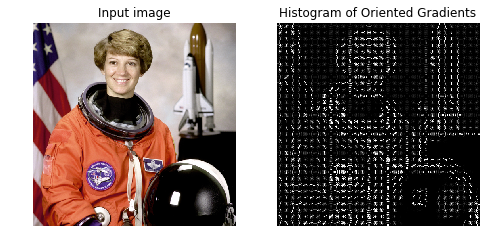

In [3]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True, feature_vector=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Визуализировать гистограмму активаций для отдельного блока и градиенты для нескольких изображений на ваш выбор.

In [4]:
fd[0][0]

array([[[0.20624069, 0.15589493, 0.04067394, 0.08100628, 0.09309454,
         0.02848952, 0.24798829, 0.14661158]]])

(array([2., 1., 1., 0., 2., 0., 1., 1.]),
 array([0.02848952, 0.05592686, 0.08336421, 0.11080155, 0.1382389 ,
        0.16567625, 0.19311359, 0.22055094, 0.24798829]),
 <a list of 8 Patch objects>)

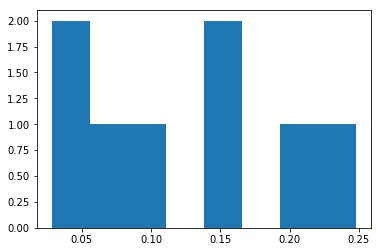

In [5]:
plt.hist(fd[0][0].reshape(-1), bins=8)

Найти примеры изображений на которых HOG дескриптор не даёт приемлемых результатов.

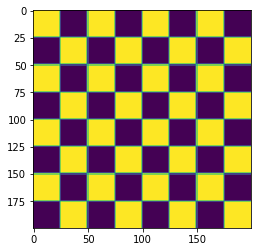

In [6]:
image = data.checkerboard()
plt.imshow(image)

/Users/dosya/Envs/ds/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


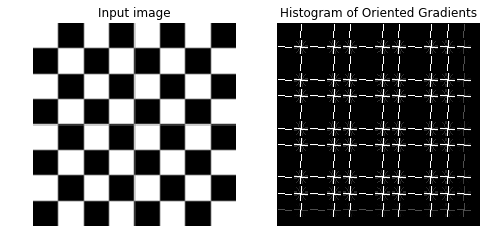

In [7]:
fd, hog_image = hog(image, orientations=180, pixels_per_cell=(16, 16
                                                           ),
                    cells_per_block=(1, 1), visualize=True, feature_vector=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

(array([  0.,   0.,   0.,   0., 180.,   0.,   0.,   0.]),
 array([-0.5  , -0.375, -0.25 , -0.125,  0.   ,  0.125,  0.25 ,  0.375,
         0.5  ]),
 <a list of 8 Patch objects>)

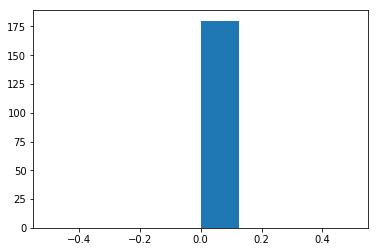

In [8]:
plt.hist(fd[0][0].reshape(-1), bins=8)

## 2 HOG дескрипторы. Похожесть.

Сейчас мы реализуем 2 простых дескриптора основанных на предсталении гистограмм, а так- же функцию для нахождения совпадений между двумя наборами дескрипторов.

Напишите ф-ю descriptors_hog(img, x, y, m) для подсчёта HoG фич в точках p = (x, y) для картинки img c размером окна m. Используйте функцию hog() из первого упражнения. Функция возвращает матрицу размера length(p) × d, где d размерность фичей.

In [9]:
from skimage import io
import numpy as np
import os

In [10]:
def descriptors_hog(img, x, y, m):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(m, m),
                    cells_per_block=(1, 1), visualize=True, feature_vector=False)
    return fd[x, y].reshape(-1)

In [11]:
path = 'images/'
files = []
for f in os.listdir(path):
    if os.path.splitext(f)[1].lower() in ('.ppm'):
        files.append(io.imread(path + f))
images = np.array(files)

In [12]:
descriptors_hog(images[0], 15, 15, 10)

/Users/dosya/Envs/ds/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


array([0.47328392, 0.05216278, 0.        , 0.04488607, 0.42966703,
       0.        , 0.        , 0.        ])

Модифицируйте descriptors_hog(img, x, y, m) заменив hog() на функцию histrg() прикреп- лённую к упражнению. Новая функция должна иметь имя descriptors_color(img, x, y, m)
Напишите ф-ю findnn вида

`[Idx, Dist] = descriptors_hog(D1, D2),`

которая находит для каждого дескриптора из набора D1 ближайший дескриптор из D2 ис- пользуя либо эвклидово расстояние, либо χ2 расстояние.

In [13]:
def descriptors_histrg(img, x, y, m):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(m, m),
                    cells_per_block=(1, 1), visualize=True, feature_vector=False)
    return fd[x, y].reshape(-1)

In [14]:
def descriptors_hog_distances(d1, d2):
    return np.linalg.norm(d1 - d2)

In [15]:
d1 = descriptors_histrg(images[0], 20, 20, 5)
d2 = descriptors_histrg(images[1], 20, 20, 5)

descriptors_hog_distances(d1, d2)

/Users/dosya/Envs/ds/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


0.0

## 3 HOG vs CNN. FashionMNIST.

В этом упражнении мы сравним эффективность HOG фичей + SVM с эффективностью CNN.

Посчитайте HOG дескрипторы для всех MNIST изображений. Натренируйте на этих фичах SVM c rbf-ядром. Сравните результат на train и val датасэтах. Визуализируйте confusion matrix.

Затем используя стандартный пример CNN для MNIST от tensorflow просто натренируйте сеть на MNIST датасэте.

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [17]:
from keras.datasets import mnist

Using TensorFlow backend.


In [18]:
mnist_ds = mnist.load_data()
mnist_train = mnist_ds[0]
mnist_test = mnist_ds[1]

In [19]:
def reshape(ds):
    return ds.reshape(ds.shape[0], ds.shape[1] * ds.shape[2])

In [20]:
def get_hog(img):
    return hog(image, orientations=8, pixels_per_cell=(10, 10), cells_per_block=(1, 1))

In [21]:
X_train, X_test, y_train, y_test = list(map(get_hog, mnist_train[0]/255.)), list(map(get_hog, mnist_test[0]/255.)), mnist_train[1], mnist_test[1]


/Users/dosya/Envs/ds/lib/python3.6/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [22]:
raw_svc = SVC(kernel='rbf')

In [ ]:
y_pred = raw_svc.fit(X_train, y_train).predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

In [ ]:
print(classification_report(y_pred, y_test))